Using CAMB 1.5.4 installed at /Users/henrybae/miniconda3/envs/cosmology/lib/python3.9/site-packages/camb
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(3051, 4)


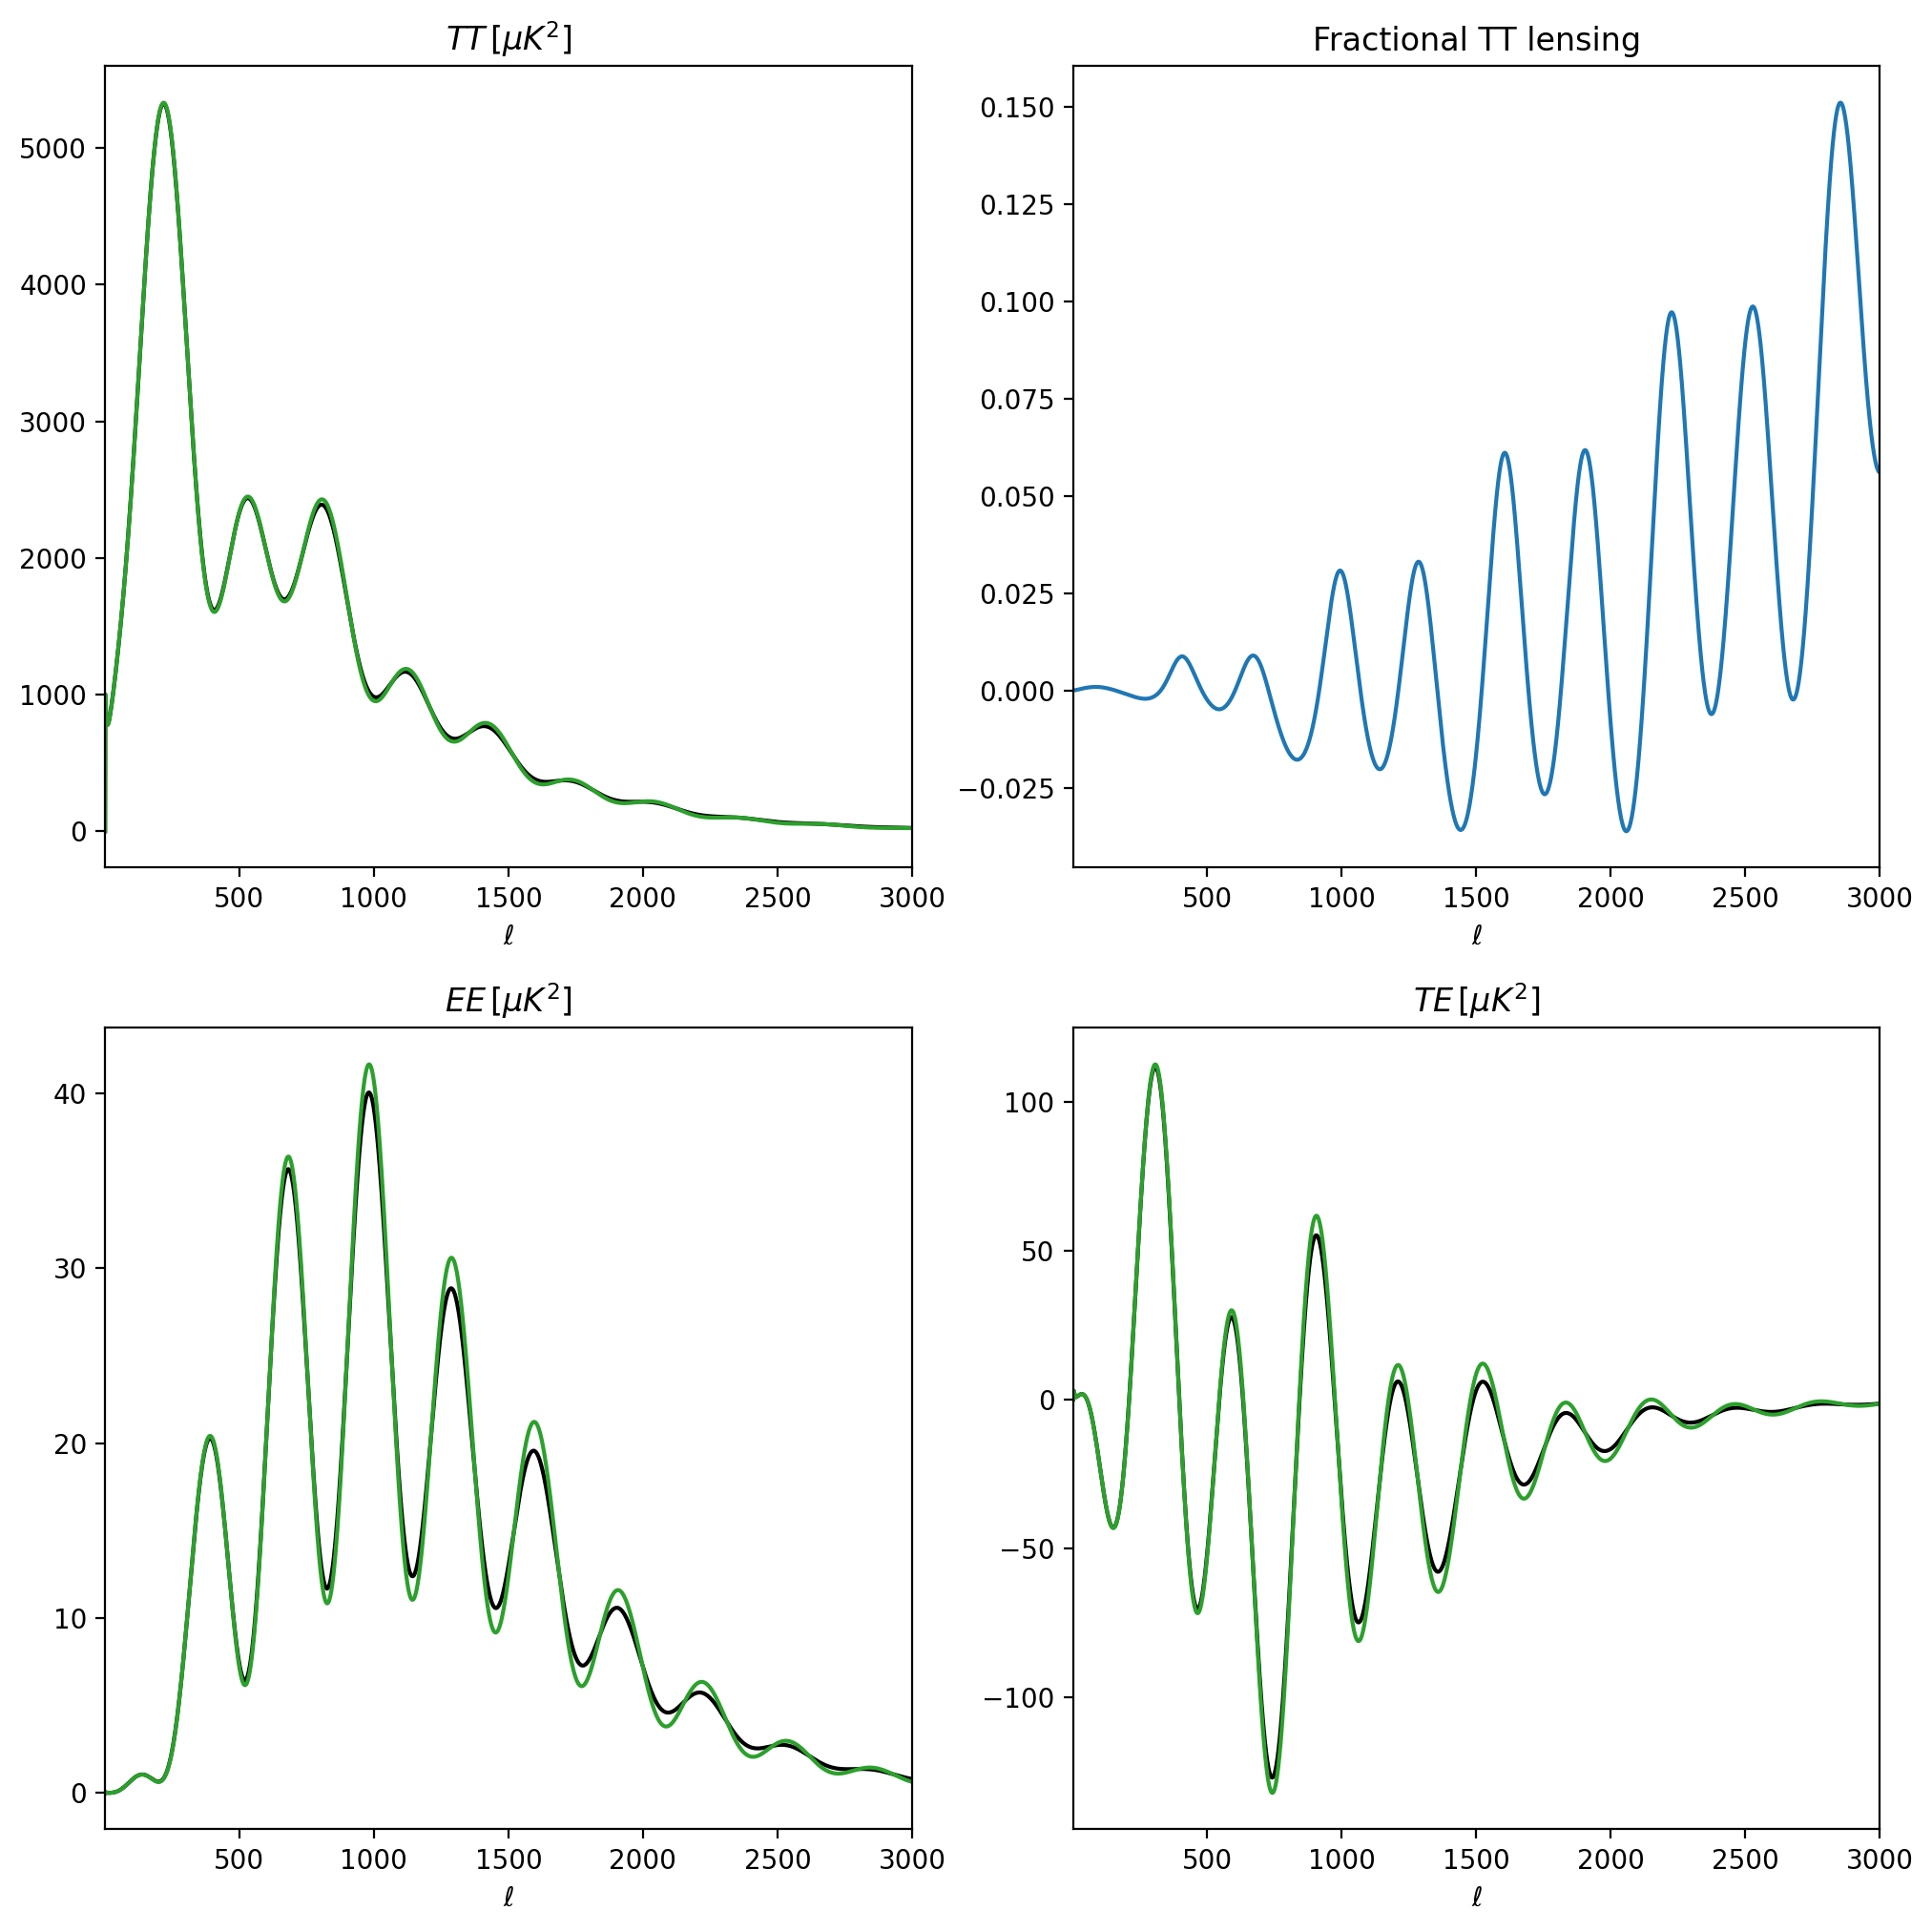

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect
#Set up a new set of parameters for CAMB
#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=69.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='C2')
ax[0,0].set_title(r'$TT\, [\mu K^2]$')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'Fractional TT lensing')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='C2')
ax[1,0].set_title(r'$EE\, [\mu K^2]$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='C2')
ax[1,1].set_title(r'$TE\, [\mu K^2]$');
for ax in ax.reshape(-1): 
    ax.set_xlim([2,3000])
    ax.set_xlabel(r'$\ell$');

In [2]:
import likelihood

planck_test = likelihood.PlanckLitePy()

In [3]:
# Cut out the first 2 elements of the power spectra, which are zero

cl_cut = totCL[2:]


# Get the TT, TE, and EE power spectra
cl_tt = cl_cut[:, 0]
cl_te = cl_cut[:, 3]
cl_ee = cl_cut[:, 1]
print(cl_tt)
print(cl_te)
print(cl_ee)
planck_test.loglike(cl_tt, cl_te, cl_ee)

[999.98726481 941.96179226 887.28908282 ...  21.38429374  21.32959739
  21.27489163]
[ 2.57616748  2.98446337  2.87259183 ... -1.03130613 -1.02537962
 -1.01956212]
[0.03237459 0.04438373 0.04128459 ... 0.69290735 0.69154747 0.69022463]


-3465187713163765.0